# Бинарная классификация
Хотим получить модель, которая задает плоскость, разделяющую пространство на объекты двух классов(-1 и 1).\
Пусть $w$ - вектор коэффов, которые задают плоскость, $w_0$ - свободный коэфф, $x$ - вектор признаков объекта, тогда модель имеет вид $y = sign((w, x) - w_0)$.\
Минимизируем ошибку с помощью функции:\
$\sum_{i}I(y_i \neq sign((w, x_i) - w_0))$\
Это равносильно:\
$\sum_{i}I(y_i ((w, x_i) - w_0) < 0)$\
Величина $M_i = y_i ((w, x_i) - w_0)$ - **отступ** (margin) классификатора, а функция потерь - misclassification loss. Отступ положителен, когда класс угадан верно. и отрицателен, когда класс угадан невено.\
Зададим функцию от отступа:\
$F(M) = I(M<0) = \begin{cases}
   1 &\text{M < 0}\\
   0 &\text{M $\geq$ 0}
 \end{cases}$\
 Функция кусочно-постоянная, градиентные методы не применимы.

## Ошибка перцептрона
Будем работать только с неправильно классифицированными объектами и учитывать их отступ.\
$F(M) = max(0, -M)$ \
После $L^2$-регуляризации получаем функцию потерь:\
$L = λ\sum_{i}w_i^2+\sum_{i}max(0, -y_i ((w, x_i) - w_0))$\
или\
$L = λ||w||_2^2+\sum_{i}max(0, -y_i ((w, x_i) - w_0))$\
$||w||_2 = \sqrt(\sum_{i}|w_i|^2)$ - евклидова метрика (расстояние, вычисляемое по т. Пифагора)\
Градиент:\
$\frac{\partial L}{\partial w} = 2λw+\sum_{i}\begin{cases}
   -y_ix_i &\text{$y_i ((w, x_i) - w_0) \leq$ 0}\\
   0 &\text{$y_i ((w, x_i) - w_0) > 0$}
 \end{cases}$\
Получили аналитическую формулу градиента, значит можем воспользоваться градиентными методами машинного обучения.
Недостаток: сильно зависит от начальных параметров.

In [38]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [39]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.label.value_counts()

,count
label,
0,50
1,50
2,50


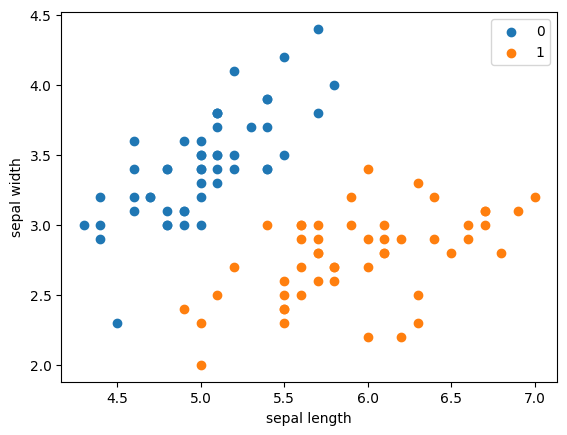

In [41]:
# plot data
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label = '0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label = '1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

In [42]:
# prepare data
data = df[:100][['sepal length', 'sepal width', 'label']]
# shuffle the DataFrame rows
data = data.sample(frac = 1)
data

,sepal length,sepal width,label
7,5.0,3.4,0
53,5.5,2.3,1
18,5.7,3.8,0
44,5.1,3.8,0
5,5.4,3.9,0
...,...,...,...
37,4.9,3.6,0
58,6.6,2.9,1
54,6.5,2.8,1
35,5.0,3.2,0


In [43]:
from sklearn.model_selection import train_test_split

X = data[['sepal length', 'sepal width']]
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [44]:
# classifer from sklearn
clf = Perceptron(fit_intercept=True, max_iter=1000, shuffle=True)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
clf.coef_

array([[ 23.3, -42.2]])

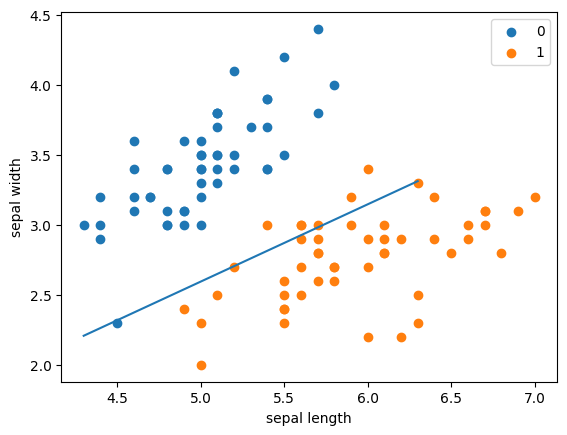

In [47]:
# plot data
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label = '0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label = '1')
x_ponits = np.arange(min(X['sepal length']), max(X['sepal length']))
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

## Hinge loss, SVM (Support Vectors Machine)
Хотим найти такую разделяющую плоскость, которая будет на одинаковом удаленни от обоих классов, то есть максимизировать минимальный отступ.\
$F(M) = max(0, 1-M)$ \
После $L^2$-регуляризации получаем функцию потерь:\
$L = λ||w||_2^2+\sum_{i}max(0, 1-y_i ((w, x_i) - w_0)) → min$\
Градиент:\
$\frac{\partial L}{\partial w} = 2λw+\sum_{i}\begin{cases}
   -y_ix_i &\text{$1-y_i ((w, x_i) - w_0) >$ 0}\\
   0 &\text{$1-y_i ((w, x_i) - w_0) \leq 0$}
 \end{cases}$\
Далее решаем градиентными методами.\
Другой взгляд:\
действуем в предположении, что выборка линейно разделима, т е $∃w: M = y_i(w, x_i) > 0 ∀ i$. Можем отнормировать все отступы, поскольку это не влияет на знак: $minM_i = 1$.\
Существуют объекты с положительной и отрицательной метками: \
$x_+: (w, x_+) = 1$\
$x_-: (w, x_-) = -1$\
Ширина полосы:\
$\cfrac{(x_+ - x_-, w)}{||w||} = \cfrac{2}{||w||}$\
(норма - длина вектора)\
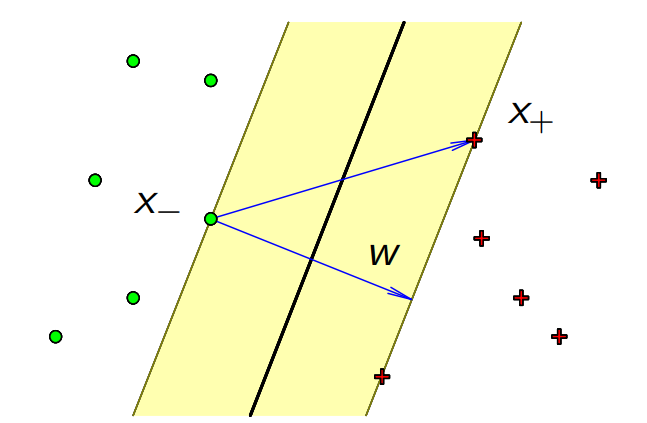

Нужно максимизировать ширину полосы, соответсвенно минимизировать длинну вектора $w$.\
Получили задачу квадратичного программирования:\
 $\begin{cases}
   \text{$||w||^2→min$}\\
   \text{$M_i \geq 1$}
 \end{cases}$\
 Такая система может быть несовместна, поэтому нужно ослабить условия:\
  $\begin{cases}
   \text{$\frac{1}{2}||w||^2 + C \sum_{i}\varepsilon_i→min$}\\
   \text{$M_i \geq 1 - \varepsilon_i$}\\
   \text{$ɛ_i \geq 0$}
 \end{cases}$\
 Такая система всегда совместна. \\
 Решение этой задачи эквивалентно минимизации функции потерь (поделить на $C$ и $λ = \frac{1}{2C}$).

## Условия Каруша-Туна-Таккера
$\begin{cases}
\text{$f(x) → min$}\\
\text{$g_i(x) \leq 0$}\\
\text{$h_j(x) = 0$}
\end{cases}$\
Необоходимое условие. Если $x$ - точка локального минимума, то существуют множжители $μ_i$ и $λ_j$ такие, что:\
$\begin{cases}
\text{$\frac{\partial \mathcal{L}}{\partial w} = 0$} & \text{$\mathcal{L}(x, μ, λ) =  f(x) + \sum_{i}μ_ig_i(x) + \sum_{j}λ_jh_j(x)$} & \text{(лагранжиан)}\\
\text{$g_i(x) \leq 0,\ h_j(x) = 0$}  & \text{(исходные ограничения)}\\
\text{$μ_i \geq$ 0} & \text{(двойственные ограничения)}\\
\text{$μ_ig_i(x) = 0$} & \text{(условие дополняющей нежесткости)}
\end{cases}$

$g_1i = 1 - \varepsilon_i - M_i$\
$g_2i =  - ɛ_i$\
(здесь нет $h$)\
$f = \frac{1}{2}||w||^2 + C \sum_{i}\varepsilon_i$\
Лагранжиан $\mathcal{L} =  \frac{1}{2}||w||^2 + C \sum_{i}\varepsilon_i + \sum_{i}\lambda_i(1 - \varepsilon_i - M_i) - \sum_{j}\eta_jɛ_j$ = $\frac{1}{2}||w||^2 -\sum_{i} \lambda_i (M_i - 1) - \sum_{i} ɛ_i (λ_i + η_i - C)$ = $\frac{1}{2}||w||^2 -\sum_{i} \lambda_i (y_i ((w, x_i) - w_0) - 1) - \sum_{i} ɛ_i (λ_i + η_i - C)$ \
Двойственные ограничения $λ_i \geq 0, \ η_i \geq 0$\
Условия дополняющей нежесткости $λ_i = 0$ или $M_i = 1 - ɛ_i$, $\ \ η_i = 0$ или $ɛ_i = 0$\
Производные $\frac{\partial \mathcal{L}}{\partial w} = 0$, $\frac{\partial \mathcal{L}}{\partial w_0} = 0$, $\frac{\partial \mathcal{L}}{\partial ɛ} = 0$\
 $\frac{\partial \mathcal{L}}{\partial w} = w - \sum_{i}λ_iy_ix_i = 0 \Rightarrow w = \sum_{i}λ_iy_ix_i$\
  $\frac{\partial \mathcal{L}}{\partial w_0} = - \sum_{i}λ_iy_i = 0 \Rightarrow \sum_{i}λ_iy_i = 0$\
 $\frac{\partial \mathcal{L}}{\partial ɛ} = -λ_i - η_i + C = 0 \Rightarrow C = λ_i + η_i$
 Что здесь важно: вектор $w$ - есть линейная комбинация произведения объектов обучающей выборки. Если $λ_i = 0$, то решение не зависит от i-го объекта. Те объекты, от которых решение зависит - **опорные**.

## Типизация объектов


1.   $λ_i = 0, η_i = C, ɛ_i = 0, M_i \geq 1$ - перифирийные (неинформативные) объекты.
Хороший объект, на нем нет ошибки, он лежит в глубине своего класса.
2.   $0 < λ_i < C, 0 < \eta_i < C, ɛ_i = 0, M_i = 1$ - опорные граничные объекты.
На них нет ошибки, но решение от них существенно зависит.
3. $\lambda_i = C, η_i = 0, ɛ_i > 0, M_i < 1$ - опорные нарушители.
Либо они попадают в разделяющие полосы, либо попадают не в свой класс (выбросы) - проблема в том, что от них тоже зависит решение.

Объект $x_i$ - **опорный**, если $λ_i \neq 0$.

## Двойственная задача
(нахождение двойственной переменной $\lambda$)\
воспользуемся полученными ограничениями и подставим в систему\
$\begin{cases}
\text{$-\mathcal{L} = -\sum_{i}λ_i + \frac{1}{2}\sum_{i}\sum_{i}λ_iλ_iy_iy_ix_ix_i → min$}\\
\text{$0\leqλ_i\leq C$}\\
\text{$\sum_{i}λ_iy_i = 0$}
\end{cases}$\
это задача квадратичного программирования относительно переменной $λ$.\
Если размерность обучающей выборки $l$, то второе неравенство в системе задает куб в $l$-мерном пространстве, а третье равенство  задает гиперплокость*, рассекающую этот куб. Решение единственно. \\
$\textit{*Гиперплокость - подпространство с размерностью, на единицу меньшей, чем объемлющее пространство.}$

Решение прямой задачи через двойственную:\
$\begin{cases}
\text{$w = \sum_{i}λ_iy_ix_i$}\\
\text{$w_0 = (w, x_i) - y_i \ \ ∀ i$}
\end{cases}$\
Классификатор\
$y = sign(\sum_{i}λ_i y_i(x, x_i) - w_0)$\
Новые признаки $f_i(x) = (x, x_i)$ - только для опорных объектов

In [49]:
from sklearn.svm import LinearSVC

clf = LinearSVC(loss='hinge', dual=True, tol=0.0001, max_iter=10000).fit(X_train, y_train)
pred = clf.predict(X_test)
clf.coef_

array([[ 1.59730516, -2.54903063]])

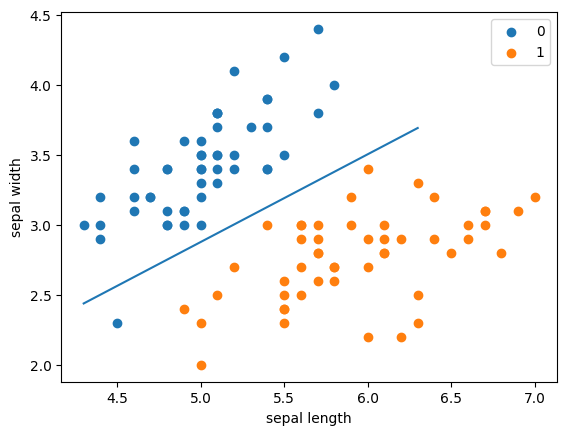

In [50]:
# plot data
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label = '0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label = '1')
x_ponits = np.arange(min(X['sepal length']), max(X['sepal length']))
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()